In [2]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import numpy as np

In [6]:
df = pd.read_csv('tennis_stats.csv')

In [8]:
print(df.head())

                 Player  Year  FirstServe  FirstServePointsWon  \
0           Pedro Sousa  2016        0.88                 0.50   
1       Roman Safiullin  2017        0.84                 0.62   
2           Pedro Sousa  2017        0.83                 0.60   
3   Rogerio Dutra Silva  2010        0.83                 0.64   
4  Daniel Gimeno-Traver  2017        0.81                 0.54   

   FirstServeReturnPointsWon  SecondServePointsWon  \
0                       0.38                  0.50   
1                       0.26                  0.33   
2                       0.28                  0.53   
3                       0.34                  0.59   
4                       0.00                  0.33   

   SecondServeReturnPointsWon  Aces  BreakPointsConverted  BreakPointsFaced  \
0                        0.39     0                  0.14                 7   
1                        0.07     7                  0.00                 7   
2                        0.44     2      

In [10]:
x = df["BreakPointsOpportunities"]
x = x.values.reshape(-1,1)
y = df["Winnings"] 

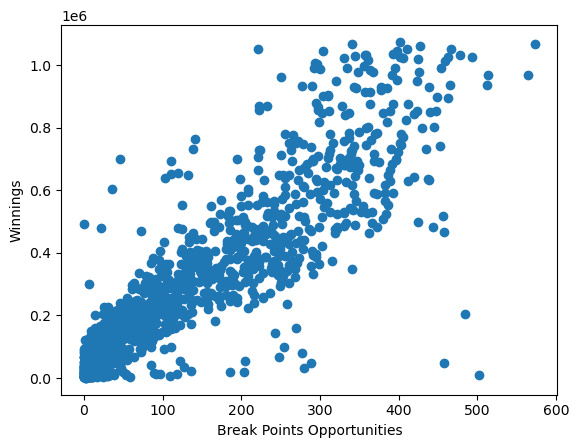

In [12]:
#Perform exploratory analysis. 
plt.scatter(x,y)
plt.xlabel("Break Points Opportunities")
plt.ylabel("Winnings")
plt.show()

In [14]:
#Perform single feature linear regression
mlr = LinearRegression()
mlr.fit(x,y)
print(mlr.coef_[0])
print(mlr.intercept_)

1856.1221542659896
43464.24566653071


In [16]:
y_predict = mlr.predict(x)
y_predict 

array([56457.10074639, 43464.24566653, 58313.22290066, ...,
       50888.73428359, 52744.85643786, 60169.34505492])

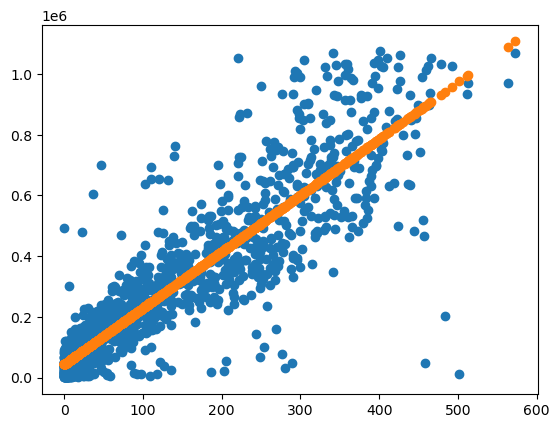

In [18]:
plt.scatter(x,y)
plt.scatter(x, y_predict)
plt.show()

In [20]:
x_future = np.array(range(0, 1000))
x_future = x_future.reshape(-1,1)
future_predict = mlr.predict(x_future)

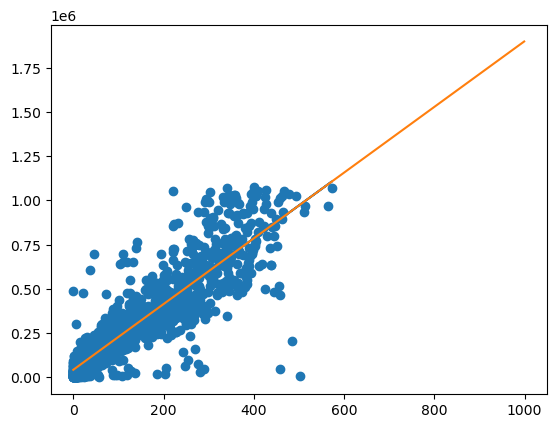

In [22]:
plt.scatter(x,y)
plt.plot(x, y_predict)
plt.plot(x_future, future_predict)
plt.show()

In [24]:
#Multiple feature linear regression

In [26]:
features = df[['FirstServe','FirstServePointsWon','FirstServeReturnPointsWon',
'SecondServePointsWon','SecondServeReturnPointsWon','Aces',
'BreakPointsConverted','BreakPointsFaced','BreakPointsOpportunities',
'BreakPointsSaved','DoubleFaults','ReturnGamesPlayed','ReturnGamesWon',
'ReturnPointsWon','ServiceGamesPlayed','ServiceGamesWon','TotalPointsWon',
'TotalServicePointsWon']]
outcome = df[['Winnings']]

features_train, features_test, outcome_train, outcome_test = train_test_split(features, outcome, train_size = .8, test_size = .2, random_state=6)

In [28]:
mlr = LinearRegression()
model = mlr.fit(features_train, outcome_train)
outcome_predict = mlr.predict(features_test)
print(mlr.coef_)
print("Train Score")
print(mlr.score(features_train, outcome_train))
print("Test Score")
print(mlr.score(features_test, outcome_test))

[[ 4.89875702e+04  7.42901191e+04  9.89184931e+01  7.92483649e+04
   4.70268779e+04 -7.10208818e+00  5.62669716e+03 -8.60991766e+02
   7.53181435e+02  3.32485493e+04  6.79780919e+02 -6.85735194e+02
   3.74129584e+04 -4.69127299e+04  1.60370526e+03  2.25631677e+04
  -1.37104257e+05 -1.17035532e+05]]
Train Score
0.8446529121626147
Test Score
0.8290563866666129


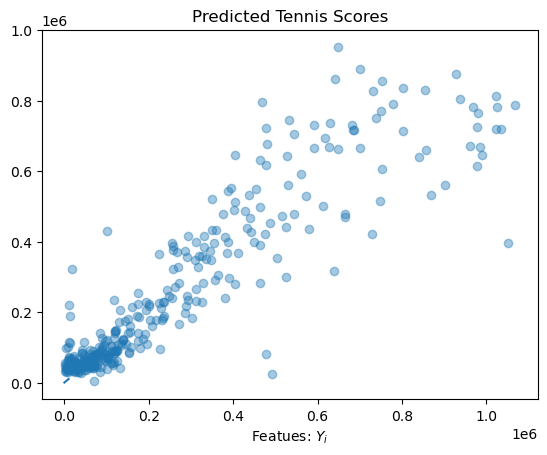

In [32]:
plt.scatter(outcome_test, outcome_predict, alpha=0.4)
plt.plot(range(10000), range(10000))
plt.xlabel("Featues: $Y_i$")
plt.title("Predicted Tennis Scores")
plt.show()